## Problem Statement

#### Find the type of Breast cancer whether it is malignant or benign tumor.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [7]:
#Get the CSV data here and load the head
df = pd.read_csv(r"C:\Users\admin\Desktop\jupyter practice\breast cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Print summary
print('Shape  ----->', df.shape)
print('Each column and data type and its count','\n')
print(df.info())

Shape  -----> (569, 33)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se    

In [8]:
#Drop Alert 1: Unnamed and id column has no use in this data set safe to remove it
df = df.drop(['Unnamed: 32'],axis=1)

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df = df.drop(['id'],axis=1)

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

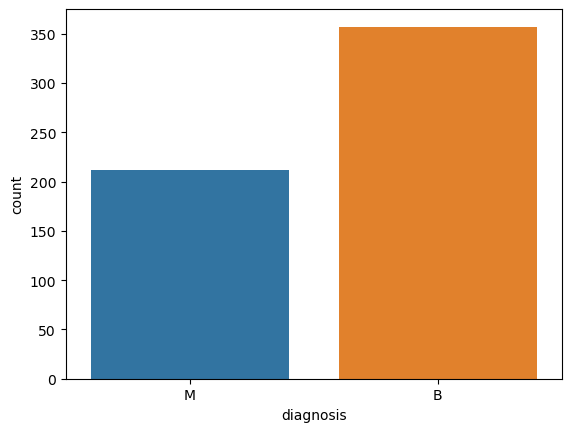

In [13]:
#Plot each class frequnecy
sns.countplot(x='diagnosis', data=df)
plt.show()

In [14]:
df.shape

(569, 31)

## Using SelectKBest feature selection method

#### SelectKBest use f_classif function to find best features, where f_classif uses ANOVA test

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

In [16]:
#Replace label column (diagnosis) into binary codes
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [17]:
X = df.drop('diagnosis',axis=1)
y = df.diagnosis

In [18]:
best_features = SelectKBest(score_func=f_classif, k=17)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)

#Concatenate DataFrames
feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']           #name output columns

print(feature_scores.nlargest(17,'Score'))                 #print 17 best features

            Feature_Name       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


## Model Building

In [19]:
new_X = df[['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst']]

In [20]:
new_X


,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,0.27700,0.86810,0.7260,5.772,86.22,39.42,0.16500


In [21]:
new_X.describe()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,14.127292,654.889104,0.088799,0.272188,0.104341,0.254265,0.405172,2.866059,40.337079,25.677223,0.132369
std,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,3.524049,351.914129,0.079720,0.208624,0.052813,0.157336,0.277313,2.021855,45.491006,6.146258,0.022832
min,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,143.500000,0.000000,0.000000,0.019380,0.027290,0.111500,0.757000,6.802000,12.020000,0.071170
25%,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,11.700000,420.300000,0.029560,0.114500,0.064920,0.147200,0.232400,1.606000,17.850000,21.080000,0.116600
50%,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,13.370000,551.100000,0.061540,0.226700,0.092630,0.211900,0.324200,2.287000,24.530000,25.410000,0.131300
75%,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,15.780000,782.700000,0.130700,0.382900,0.130400,0.339100,0.478900,3.357000,45.190000,29.720000,0.146000
max,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,2501.000000,0.426800,1.252000,0.345400,1.058000,2.873000,21.980000,542.200000,49.540000,0.222600


In [22]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

In [23]:
#Building model to test unexposed data
x_train, x_test, y_train, y_test = train_test_split(X_scalar, y, test_size=0.25, random_state=355)

In [24]:
#Write one function and call as many as times to check accuracy_score of different models
def metric_score(clf, x_train,x_test,y_train,y_test, train=True): 
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n================Train Result=========================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False: 
        pred = clf.predict(x_test)
        
        print("\n===============Test Result===========================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))   ##Model confidence/accuracy
        

In [25]:
 # Initiate KNeighbors Classifier 
knn = KNeighborsClassifier()

#Model Training 
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
# Call the function and pass dataset to check train and test score 
metric_score(knn,x_train,x_test,y_train,y_test,train=True) # This is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False) # This is for test score


================Train Result=========================
Accuracy Score: 98.83%

===============Test Result===========================
Accuracy Score: 95.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



#### Cross validation score to check if model is overfitting

In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn, X_scalar, y, cv=5)


array([0.96491228, 0.96491228, 0.97368421, 0.98245614, 0.96460177])

In [28]:
cross_val_score(knn, X_scalar, y, cv=5).mean()

0.9701133364384411

## Let's use GridSearchCV for the best parametrer to improve the accuracy

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = { 'algorithm' : ['kd_tree', 'brute'],
               'leaf_size'   : [3,5,6,7,8],
               'n_neighbors' : [3,5,7,9,11,13]
            }


In [31]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)

In [32]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [33]:
gridsearch.best_score_

0.9765253077975377

In [34]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [35]:
#We will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [36]:
# Call the function and pass dataset to check train and test score 
metric_score(knn,x_train,x_test,y_train,y_test,train=True) # This is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False) # This is for test score


================Train Result=========================
Accuracy Score: 98.36%

===============Test Result===========================
Accuracy Score: 95.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [37]:
#checking confusion matrix
y_pred = knn.predict(x_test)
cfm = confusion_matrix(y_test, y_pred)

In [38]:
cfm

array([[91,  2],
       [ 4, 46]], dtype=int64)